In [26]:
import pandas as pd

# Load JSON Files into Pandas Dataframe

In [27]:
filename = 'cluster_0-gun_ right_ cialis.json'
path = './lda_clustered_json/'+filename
 
with open(path, encoding='utf-8', mode='r') as currentFile:
    df = pd.read_json(currentFile, orient='index')

df.head(3)

,date_download,date_modify,date_publish,description,language,source_domain,maintext,title,url,LDA_ID,LDA_topic_percentage,LDA_topic_keywords,filtered_maintext
18,"07/14/2021, 01:00:35","07/14/2021, 01:00:35","06/12/2021, 12:38:22","This material may not be published, broadcast,...",en,www.foxnews.com,"This material may not be published, broadcast...",Johnson's 17 points leads No. 18 Arizona to 73...,https://www.foxnews.com/sports/johnsons-17-poi...,0,0.61873,"gun, right, cialis, viagra, child, school, mod...",material broadcast network llc right real mark...
38,"07/14/2021, 01:04:12","07/14/2021, 01:04:12","06/12/2021, 15:33:07","This material may not be published, broadcast,...",en,www.foxnews.com,"This material may not be published, broadcast...",Microsoft Surface Torn Down: A Mixed Bag of Re...,https://www.foxnews.com/tech/microsoft-surface...,0,0.63235,"gun, right, cialis, viagra, child, school, mod...",material broadcast network llc right real mark...
69,"07/14/2021, 01:13:12","07/14/2021, 01:13:12","06/13/2021, 15:34:01",A specific dose of Alzheimer's drug should be ...,en,thechart.blogs.cnn.com,A specific dose of Alzheimer's drug should be ...,"Stop selling higher dose Alzheimer's drug, gro...",https://thechart.blogs.cnn.com/2011/05/18/stop...,0,0.75157,"gun, right, cialis, viagra, child, school, mod...",dose alzheimer drug market risk patient consum...


In [28]:
amount_of_articles = len(df["filtered_maintext"])
print(f"Amount of articles: {amount_of_articles}")
processed_articles = df['filtered_maintext']

Amount of articles: 804


In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfconverter = TfidfVectorizer(lowercase=True, stop_words='english', min_df=0.05 , max_df=0.6)  
tfidf = tfidfconverter.fit_transform(processed_articles)
words = tfidfconverter.get_feature_names()
print(tfidf)

  (0, 76)	0.20872475803812365
  (0, 228)	0.7341244999321962
  (0, 72)	0.17937718610742043
  (0, 236)	0.17588567131216526
  (0, 213)	0.5953009740563866
  (1, 338)	0.08700867416594625
  (1, 487)	0.0894056716119397
  (1, 499)	0.15890398679320933
  (1, 441)	0.1650527085186992
  (1, 294)	0.1199533154963824
  (1, 328)	0.11940027703212909
  (1, 221)	0.13807406594866548
  (1, 104)	0.16086502437647585
  (1, 306)	0.14327177388440132
  (1, 420)	0.11777937911744944
  (1, 226)	0.36302480244013763
  (1, 498)	0.11647029618382229
  (1, 1)	0.5354893151097394
  (1, 356)	0.17386580110249958
  (1, 361)	0.1804853004284414
  (1, 494)	0.4960778479051375
  (1, 335)	0.15580807318818585
  (1, 140)	0.17129279137753411
  (1, 228)	0.17129279137753411
  (2, 254)	0.02954310887893197
  :	:
  (802, 225)	0.08695070434398101
  (802, 110)	0.024914350960125054
  (802, 362)	0.11353648654141045
  (802, 428)	0.02202907277854361
  (802, 159)	0.08424713657542483
  (802, 20)	0.1913119188269865
  (802, 157)	0.17006626332691765
 

In [30]:
from sklearn.metrics.pairwise import cosine_distances

cosine_similarity = cosine_distances(tfidf)
cosine_similarity

array([[0.        , 0.87424977, 0.96602483, ..., 0.99602891, 0.91413398,
        1.        ],
       [0.87424977, 0.        , 0.90790371, ..., 0.95238206, 0.93482432,
        1.        ],
       [0.96602483, 0.90790371, 0.        , ..., 0.69282881, 0.56974113,
        0.97699253],
       ...,
       [0.99602891, 0.95238206, 0.69282881, ..., 0.        , 0.88470779,
        0.98300588],
       [0.91413398, 0.93482432, 0.56974113, ..., 0.88470779, 0.        ,
        0.97826315],
       [1.        , 1.        , 0.97699253, ..., 0.98300588, 0.97826315,
        0.        ]])

In [31]:
from sklearn.cluster import AffinityPropagation

In [32]:
'''
clustering = AffinityPropagation(convergence_iter=5, affinity='precomputed', random_state=10)
clustering.fit(cosine_similarity)
labels = clustering.labels_
print(labels.dtype)
#cluster_centers = clustering.cluster_centers_
cluster_centers_indices = clustering.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
print(n_clusters_)'''

"\nclustering = AffinityPropagation(convergence_iter=5, affinity='precomputed', random_state=10)\nclustering.fit(cosine_similarity)\nlabels = clustering.labels_\nprint(labels.dtype)\n#cluster_centers = clustering.cluster_centers_\ncluster_centers_indices = clustering.cluster_centers_indices_\nn_clusters_ = len(cluster_centers_indices)\nprint(n_clusters_)"

In [33]:
'''
import matplotlib.pyplot as plt
from itertools import cycle

plt.close('all')
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = cosine_similarity[cluster_centers_indices[k]]
    plt.plot(cosine_similarity[class_members, 0], cosine_similarity[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    for x in cosine_similarity[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()'''

"\nimport matplotlib.pyplot as plt\nfrom itertools import cycle\n\nplt.close('all')\nplt.figure(1)\nplt.clf()\n\ncolors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')\nfor k, col in zip(range(n_clusters_), colors):\n    class_members = labels == k\n    cluster_center = cosine_similarity[cluster_centers_indices[k]]\n    plt.plot(cosine_similarity[class_members, 0], cosine_similarity[class_members, 1], col + '.')\n    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,\n             markeredgecolor='k', markersize=14)\n    for x in cosine_similarity[class_members]:\n        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)\n\nplt.title('Estimated number of clusters: %d' % n_clusters_)\nplt.show()"

In [34]:
'''
df['processed_articles'] = processed_articles
df['affpropID'] = clustering.labels_'''


"\ndf['processed_articles'] = processed_articles\ndf['affpropID'] = clustering.labels_"

In [35]:
df.head()

,date_download,date_modify,date_publish,description,language,source_domain,maintext,title,url,LDA_ID,LDA_topic_percentage,LDA_topic_keywords,filtered_maintext
18,"07/14/2021, 01:00:35","07/14/2021, 01:00:35","06/12/2021, 12:38:22","This material may not be published, broadcast,...",en,www.foxnews.com,"This material may not be published, broadcast...",Johnson's 17 points leads No. 18 Arizona to 73...,https://www.foxnews.com/sports/johnsons-17-poi...,0,0.61873,"gun, right, cialis, viagra, child, school, mod...",material broadcast network llc right real mark...
38,"07/14/2021, 01:04:12","07/14/2021, 01:04:12","06/12/2021, 15:33:07","This material may not be published, broadcast,...",en,www.foxnews.com,"This material may not be published, broadcast...",Microsoft Surface Torn Down: A Mixed Bag of Re...,https://www.foxnews.com/tech/microsoft-surface...,0,0.63235,"gun, right, cialis, viagra, child, school, mod...",material broadcast network llc right real mark...
69,"07/14/2021, 01:13:12","07/14/2021, 01:13:12","06/13/2021, 15:34:01",A specific dose of Alzheimer's drug should be ...,en,thechart.blogs.cnn.com,A specific dose of Alzheimer's drug should be ...,"Stop selling higher dose Alzheimer's drug, gro...",https://thechart.blogs.cnn.com/2011/05/18/stop...,0,0.75157,"gun, right, cialis, viagra, child, school, mod...",dose alzheimer drug market risk patient consum...
71,"07/14/2021, 01:13:12","07/14/2021, 01:13:12","06/13/2021, 15:54:01","Editor's note: Last summer, this article was o...",en,thechart.blogs.cnn.com,"Editor's note: Last summer, this article was o...",6 tips for minimizing cell phone radiation – T...,https://thechart.blogs.cnn.com/2012/06/08/6-ti...,0,0.48768,"gun, right, cialis, viagra, child, school, mod...",editor note summer chart share tip scientists ...
72,"07/14/2021, 01:13:12","07/14/2021, 01:13:12","06/13/2021, 15:24:38",The virus causing your cold sore may put you a...,en,thechart.blogs.cnn.com,The virus causing your cold sore may put you a...,Cold sores linked to cognitive decline – The C...,https://thechart.blogs.cnn.com/2013/03/26/cold...,0,0.57721,"gun, right, cialis, viagra, child, school, mod...",virus cold sore risk lower cognitive ability s...


In [36]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn import metrics
from tqdm import tqdm
from scipy.spatial.distance import cdist
import numpy as np


In [37]:
max_clusters = 10

In [38]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}

last_distortion = 0

all_kmeans_models = []

K = range(2,max_clusters)
X = np.matrix(tfidf.toarray())
for i in tqdm(K):
    print("Iteration: " + str(i))
    kMeans = KMeans(n_clusters=i, max_iter=400).fit(tfidf)
    kMeans.predict(tfidf)
    labels = kMeans.labels_
    cluster_centers = kMeans.cluster_centers_
    inertias.append(kMeans.inertia_)
    distortions.append(sum(np.min(cdist(X, cluster_centers, 'euclidean'), axis=1)) / X.shape[0])

    this_silhouette = metrics.silhouette_score(tfidf.toarray(), labels, metric='sqeuclidean')

    print("Silhouette Score: " + str(this_silhouette))

    mapping1[i] =  sum(np.min(cdist(X, cluster_centers, 'euclidean'), axis=1)) / X.shape[0]
    mapping2[i] = kMeans.inertia_

    all_kmeans_models.append(kMeans)

    common_words = kMeans.cluster_centers_.argsort()[:,-1:-11:-1]
    for num, centroid in enumerate(common_words):
        print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

  0%|          | 0/8 [00:00<?, ?it/s]

Iteration: 2


 12%|█▎        | 1/8 [00:00<00:02,  3.21it/s]

Silhouette Score: 0.08475549620972486
0 : police, morning, subscribed, newsletter, president, city, game, aposs, service, woman
1 : viagra, cialis, pharmacy, prescription, canada, loan, price, thesis, buy, drug
Iteration: 3


 25%|██▌       | 2/8 [00:00<00:02,  2.28it/s]

Silhouette Score: 0.10788397471168751
0 : alzheimer, aricept, dose, patient, help, group, homework, service, lah, drug
1 : police, morning, subscribed, newsletter, president, city, game, aposs, woman, security
2 : viagra, cialis, pharmacy, prescription, canada, loan, price, thesis, buy, drug
Iteration: 4


 38%|███▊      | 3/8 [00:01<00:02,  2.03it/s]

Silhouette Score: 0.11624685897007317
0 : game, casino, tadalafil, security, service, effect, viagra, help, team, thesis
1 : police, morning, subscribed, newsletter, president, city, aposs, woman, man, report
2 : alzheimer, aricept, dose, patient, help, group, homework, service, lah, drug
3 : viagra, cialis, pharmacy, prescription, canada, loan, thesis, price, buy, drug
Iteration: 5


 50%|█████     | 4/8 [00:02<00:02,  1.74it/s]

Silhouette Score: 0.12187189191981652
0 : casino, tadalafil, security, effect, chloroquine, game, clearance, service, intelligence, money
1 : viagra, cialis, pharmacy, prescription, canada, loan, thesis, price, buy, drug
2 : morning, newsletter, subscribed, president, city, aposs, game, government, school, york
3 : police, woman, man, officer, morning, car, incident, subscribed, newsletter, boy
4 : alzheimer, aricept, dose, help, homework, patient, service, group, lah, drug
Iteration: 6


 62%|██████▎   | 5/8 [00:02<00:02,  1.46it/s]

Silhouette Score: 0.12779561485556135
0 : game, search, health, york, player, aposs, child, star, woman, service
1 : viagra, cialis, pharmacy, prescription, canada, loan, thesis, price, buy, drug
2 : morning, subscribed, newsletter, president, city, government, official, court, judge, border
3 : casino, tadalafil, security, effect, chloroquine, game, clearance, service, intelligence, money
4 : police, woman, man, officer, morning, incident, subscribed, car, newsletter, boy
5 : alzheimer, aricept, dose, patient, help, group, homework, service, lah, drug
Iteration: 7


 75%|███████▌  | 6/8 [00:03<00:01,  1.39it/s]

Silhouette Score: 0.12872209295370426
0 : morning, subscribed, newsletter, president, government, city, official, border, house, report
1 : alzheimer, aricept, dose, patient, group, lah, medical, drug, info, neurology
2 : police, woman, man, officer, morning, incident, subscribed, car, newsletter, boy
3 : viagra, cialis, pharmacy, prescription, canada, loan, thesis, price, buy, drug
4 : casino, tadalafil, security, effect, chloroquine, game, clearance, intelligence, dosage, team
5 : game, school, child, health, search, aposs, york, star, woman, judge
6 : help, homework, service, essay, viagra, thesis, cialis, order, paper, info
Iteration: 8


 88%|████████▊ | 7/8 [00:04<00:00,  1.34it/s]

Silhouette Score: 0.11938413403613854
0 : viagra, cialis, pharmacy, prescription, loan, thesis, canada, price, buy, cash
1 : morning, president, subscribed, newsletter, government, school, official, city, report, house
2 : game, health, child, player, york, star, aposs, city, team, film
3 : police, woman, man, officer, morning, car, incident, subscribed, newsletter, boy
4 : alzheimer, aricept, dose, patient, group, lah, medical, drug, info, neurology
5 : help, homework, essay, service, thesis, viagra, paper, business, aricept, college
6 : casino, tadalafil, security, effect, chloroquine, game, clearance, intelligence, dosage, team
7 : cialis, pharmacy, prescription, viagra, tadalafil, canada, drug, price, buy, cost
Iteration: 9


100%|██████████| 8/8 [00:05<00:00,  1.47it/s]

Silhouette Score: 0.14578273040557524
0 : viagra, cialis, pharmacy, prescription, canada, loan, thesis, price, buy, drug
1 : police, woman, man, officer, morning, incident, car, subscribed, newsletter, boy
2 : morning, subscribed, newsletter, city, government, official, mile, border, town, aposs
3 : president, house, search, party, obama, campaign, government, america, morning, congress
4 : game, health, school, player, child, team, york, aposs, film, business
5 : court, judge, prison, lawyer, charge, morning, subscribed, newsletter, child, man
6 : casino, tadalafil, security, effect, chloroquine, game, clearance, intelligence, service, money
7 : alzheimer, aricept, dose, patient, group, lah, medical, drug, info, neurology
8 : help, homework, essay, service, viagra, paper, aricept, college, alzheimer, business


In [39]:
from kneed import KneeLocator
print(distortions)
print("The elbow point of the curve is: ")
kneedle = KneeLocator(K, distortions, S=1.0, curve="convex", direction="decreasing")
print(kneedle.knee_y)
knee = kneedle.knee

[0.921756189513762, 0.899658139012335, 0.8893302055485194, 0.8782770928790529, 0.8724591568302289, 0.8599163901975326, 0.8466273922323194, 0.8491628561693155]
The elbow point of the curve is: 
0.8466273922323194


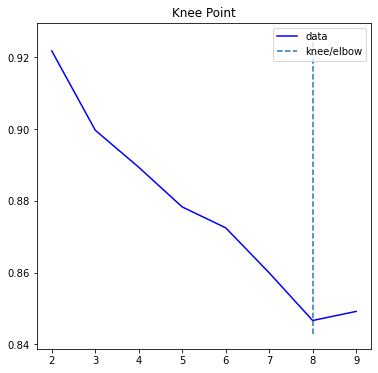

In [40]:
kneedle.plot_knee()

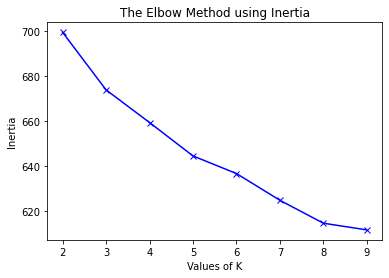

In [41]:
import matplotlib.pyplot as plt

plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

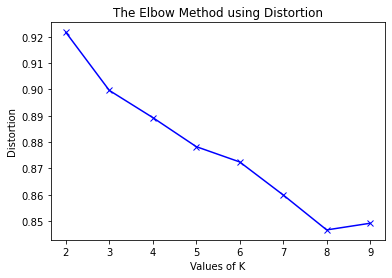

In [42]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [43]:
# save the clusterIDs to the dataframe
# minus 2 because we start checking with 2 clusters
df["kMeans_ID"] = all_kmeans_models[knee-2].labels_

df.head()

,date_download,date_modify,date_publish,description,language,source_domain,maintext,title,url,LDA_ID,LDA_topic_percentage,LDA_topic_keywords,filtered_maintext,kMeans_ID
18,"07/14/2021, 01:00:35","07/14/2021, 01:00:35","06/12/2021, 12:38:22","This material may not be published, broadcast,...",en,www.foxnews.com,"This material may not be published, broadcast...",Johnson's 17 points leads No. 18 Arizona to 73...,https://www.foxnews.com/sports/johnsons-17-poi...,0,0.61873,"gun, right, cialis, viagra, child, school, mod...",material broadcast network llc right real mark...,2
38,"07/14/2021, 01:04:12","07/14/2021, 01:04:12","06/12/2021, 15:33:07","This material may not be published, broadcast,...",en,www.foxnews.com,"This material may not be published, broadcast...",Microsoft Surface Torn Down: A Mixed Bag of Re...,https://www.foxnews.com/tech/microsoft-surface...,0,0.63235,"gun, right, cialis, viagra, child, school, mod...",material broadcast network llc right real mark...,2
69,"07/14/2021, 01:13:12","07/14/2021, 01:13:12","06/13/2021, 15:34:01",A specific dose of Alzheimer's drug should be ...,en,thechart.blogs.cnn.com,A specific dose of Alzheimer's drug should be ...,"Stop selling higher dose Alzheimer's drug, gro...",https://thechart.blogs.cnn.com/2011/05/18/stop...,0,0.75157,"gun, right, cialis, viagra, child, school, mod...",dose alzheimer drug market risk patient consum...,4
71,"07/14/2021, 01:13:12","07/14/2021, 01:13:12","06/13/2021, 15:54:01","Editor's note: Last summer, this article was o...",en,thechart.blogs.cnn.com,"Editor's note: Last summer, this article was o...",6 tips for minimizing cell phone radiation – T...,https://thechart.blogs.cnn.com/2012/06/08/6-ti...,0,0.48768,"gun, right, cialis, viagra, child, school, mod...",editor note summer chart share tip scientists ...,2
72,"07/14/2021, 01:13:12","07/14/2021, 01:13:12","06/13/2021, 15:24:38",The virus causing your cold sore may put you a...,en,thechart.blogs.cnn.com,The virus causing your cold sore may put you a...,Cold sores linked to cognitive decline – The C...,https://thechart.blogs.cnn.com/2013/03/26/cold...,0,0.57721,"gun, right, cialis, viagra, child, school, mod...",virus cold sore risk lower cognitive ability s...,7


# Subcluster by release date

We will determine each articles release date and sort them into individual json files.

In [44]:
def getMonthYear(s):
     return s.split('-')[0]+"-"+s.split('-')[1]

import datetime as dt

df['date_publish'] = pd.to_datetime(df['date_publish'])
df['date_modify'] = pd.to_datetime(df['date_modify'])
df['date_modify'] = df['date_modify'].dt.strftime('%m/%d/%Y, %H:%M:%S')
df['date_download'] = pd.to_datetime(df['date_download'])
df['date_download'] = df['date_download'].dt.strftime('%m/%d/%Y, %H:%M:%S')
df['month_year'] = df['date_publish'].apply(lambda x: getMonthYear(str(x)))
df['date_publish'] = df['date_publish'].dt.strftime('%m/%d/%Y, %H:%M:%S')
df.head(3)

df = df.drop(columns=["maintext_prepro", "maintext_nouns", "maintext_ready", "corpus", "id"], errors='ignore')   #drop unwanted attributes that should not be output into the json files.
df.head()

# Generating folder structure

The following code creates the desired folder hierarchy and names each cluster after the top 3 dominant words in each one. Within each cluster/folder we are subclustering all articles by their release date.
The output json file has the format *year-month.json*. 

In [45]:
import json

for cluster_id, data in df.groupby(df.clusterID):
    item = data.topic_keywords.iloc[0].split(",")
    os.makedirs(f'./cluster_dataset/cluster_{cluster_id}-{item[0]}_{item[1]}_{item[2]}')
    for date, date_data in data.groupby(data.month_year):
             json_data = date_data.to_json(orient='records', force_ascii=False, date_format='iso', date_unit='s')
             parsed = json.loads(json_data)
             with open(f'./cluster_dataset/cluster_{cluster_id}-{item[0]}_{item[1]}_{item[2]}/{date}.json', 'w', encoding='utf-8') as f:
                 f.write(json.dumps({"data": parsed}, indent=4, ensure_ascii=False))

AttributeError: 'DataFrame' object has no attribute 'clusterID'